In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress


In [2]:
# Read raw csv file and view it.
listing_data = pd.read_csv("clean_data_rs/airbnbFINAL_Swobabika.csv", low_memory=False, encoding="UTF-8")
listing_data.head()

,id,host_id,host_name,host_is_superhost,host_total_listings_count,street,neighbourhood_cleansed,city,state,zipcode,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,distance_from_cbd
0,12936,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,15,94,9,10,94,9,9,9,0.15,5.205174
1,47100,212071,Loren,t,4,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,176,98,10,10,98,10,10,10,1.75,3.649571
2,50492,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,44,97,10,10,97,10,9,10,0.60,5.437003
3,51592,190879,Michelle,t,1,"Melbourne, VIC, Australia",Melbourne,Melbourne,Vic,3000,...,196,99,10,9,99,10,10,10,2.07,0.072335
4,66754,50121,Frank & Vince,t,17,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,43,95,9,10,95,10,10,9,0.46,2.794548


## Basic clean up and filtering of relevant Data.

In [3]:
# Get the column names so that necessary column names can be extracted.
listing_data.columns

Index(['id', 'host_id', 'host_name', 'host_is_superhost',
       'host_total_listings_count', 'street', 'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'latitude', 'longitude', 'property_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'distance_from_cbd'],
      dtype='object')

In [4]:
# Get the data with relevant columns into a new dataframe and view it.
price_airbnb_data = listing_data[["city","property_type","accommodates","price"]]
price_airbnb_data

,city,property_type,accommodates,price
0,St Kilda,Apartment,3,159.0
1,Richmond,Apartment,2,98.0
2,St Kilda,Apartment,4,190.0
3,Melbourne,Loft,4,228.0
4,Richmond,Apartment,4,138.0
...,...,...,...,...
9303,Melbourne,Apartment,5,156.0
9304,Brunswick West,House,6,199.0
9305,Port Melbourne,Apartment,4,140.0
9306,Preston,Apartment,2,71.0


In [5]:
# Rename columns for better readability
price_data_renamed=price_airbnb_data.rename(columns={"city":"Suburbs", 
                                                     "price":"Price/Day($)" })
price_data_renamed

,Suburbs,property_type,accommodates,Price/Day($)
0,St Kilda,Apartment,3,159.0
1,Richmond,Apartment,2,98.0
2,St Kilda,Apartment,4,190.0
3,Melbourne,Loft,4,228.0
4,Richmond,Apartment,4,138.0
...,...,...,...,...
9303,Melbourne,Apartment,5,156.0
9304,Brunswick West,House,6,199.0
9305,Port Melbourne,Apartment,4,140.0
9306,Preston,Apartment,2,71.0


In [6]:
# check datatype to make sure price columns are numerical
price_data_renamed.dtypes

Suburbs           object
property_type     object
accommodates       int64
Price/Day($)     float64
dtype: object

In [7]:
# Convert Price/Day Column to integer type
price_data_renamed["Price/Day($)"] = price_data_renamed["Price/Day($)"].astype('int64')
price_data_renamed.dtypes

Suburbs          object
property_type    object
accommodates      int64
Price/Day($)      int64
dtype: object

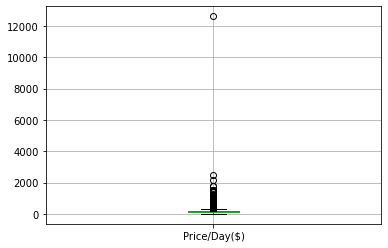

In [8]:
# Check via box and whisker plot if there are extreme values in the dataset.
price_data_renamed.boxplot(column='Price/Day($)', return_type='axes')

In [9]:
# Making sure unique values show extreme values
c=price_data_renamed['Price/Day($)'].unique()
c.sort()
print(c)

[    0    12    30    39    40    46    47    48    50    53    54    55
    57    58    60    61    62    64    65    66    68    69    71    72
    73    75    76    78    79    80    82    83    84    86    87    89
    90    91    93    94    96    97    98   100   101   102   104   105
   107   108   109   111   112   114   115   116   118   119   120   121
   122   123   125   126   127   129   130   132   133   134   136   137
   138   140   141   143   144   145   147   148   150   151   152   154
   155   156   158   159   161   162   163   165   166   168   169   170
   172   173   174   176   177   179   180   181   183   184   186   187
   188   190   191   192   194   195   197   198   199   202   203   205
   206   208   209   210   212   213   215   216   217   219   220   221
   224   226   227   228   230   233   234   235   237   238   239   241
   242   244   245   246   248   249   251   255   256   257   259   260
   262   264   266   269   270   271   275   277   

In [10]:
# Clean price data for extreme values i.e. rows with values=0 and <2500 price/day values.
price_data_cleaned = price_data_renamed.loc[(price_data_renamed["Price/Day($)"] > 0) &
                                            (price_data_renamed["Price/Day($)"] < 2500)]
len(price_data_cleaned)

9304

In [11]:
# Making sure extereme values are removed from dataset.
b= price_data_cleaned['Price/Day($)'].unique()
b.sort()
print(b)

[  12   30   39   40   46   47   48   50   53   54   55   57   58   60
   61   62   64   65   66   68   69   71   72   73   75   76   78   79
   80   82   83   84   86   87   89   90   91   93   94   96   97   98
  100  101  102  104  105  107  108  109  111  112  114  115  116  118
  119  120  121  122  123  125  126  127  129  130  132  133  134  136
  137  138  140  141  143  144  145  147  148  150  151  152  154  155
  156  158  159  161  162  163  165  166  168  169  170  172  173  174
  176  177  179  180  181  183  184  186  187  188  190  191  192  194
  195  197  198  199  202  203  205  206  208  209  210  212  213  215
  216  217  219  220  221  224  226  227  228  230  233  234  235  237
  238  239  241  242  244  245  246  248  249  251  255  256  257  259
  260  262  264  266  269  270  271  275  277  278  280  285  287  288
  289  291  293  295  296  298  299  300  302  305  307  309  310  316
  317  318  320  321  323  324  325  327  329  332  334  335  336  338
  339 

### Generating Price/Day/Person data for further analysis

In [12]:
# Create a copy to retain original.
price_data_cleaned2 = price_data_cleaned.copy()

In [13]:
# Create a new column for price/day/person and fill calculated values
price_per_person = round((price_data_cleaned2['Price/Day($)']/price_data_cleaned2['accommodates']),2)
price_data_cleaned2['Price/Day/Person($)'] = price_per_person
price_data_cleaned2

,Suburbs,property_type,accommodates,Price/Day($),Price/Day/Person($)
0,St Kilda,Apartment,3,159,53.00
1,Richmond,Apartment,2,98,49.00
2,St Kilda,Apartment,4,190,47.50
3,Melbourne,Loft,4,228,57.00
4,Richmond,Apartment,4,138,34.50
...,...,...,...,...,...
9303,Melbourne,Apartment,5,156,31.20
9304,Brunswick West,House,6,199,33.17
9305,Port Melbourne,Apartment,4,140,35.00
9306,Preston,Apartment,2,71,35.50


## Price/Day/Person Analysis based on Property_Type

In [14]:
# Groupby on propert types and find the mean price/day/person for each type.
grouped_property_type = price_data_cleaned2.groupby('property_type')["Price/Day/Person($)"].mean().sort_values()
grouped_property_type

property_type
Townhouse             43.436658
Apartment             44.377391
House                 45.708771
Loft                  51.321040
Serviced apartment    58.848679
Name: Price/Day/Person($), dtype: float64

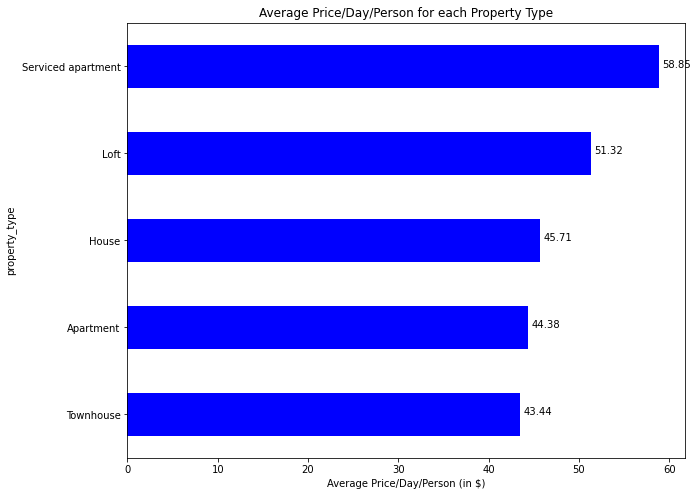

In [15]:
# Plot the average price/day/person based on propert_type.
bplot3=grouped_property_type.plot(kind="barh",figsize=(10,8),color="blue")
plt.xlabel("Average Price/Day/Person (in $)")
plt.title("Average Price/Day/Person for each Property Type")
for b in bplot3.patches:
    width = b.get_width()
    plt.text(2+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

In [16]:
# convert grouped property type dataseries to a Dataframe
property_type_DF =pd.DataFrame(grouped_property_type)
property_type_DF.reset_index(level=0, inplace=True)
property_type_DF

,property_type,Price/Day/Person($)
0,Townhouse,43.436658
1,Apartment,44.377391
2,House,45.708771
3,Loft,51.321040
4,Serviced apartment,58.848679


In [17]:
# Print Output Data.
print("Average Airbnb Prices based on property types in Melbourne metropolitan area are: ")
print("-----------------------------------------------------------------------------------")
for i in range(0,5):
    property_type=property_type_DF.iloc[i,0]
    price = round(property_type_DF.iloc[i,1],0)
    print(f"Average Price/Day/Person for a {property_type} in Metropolitan Melbourne is ${price}")

Average Airbnb Prices based on property types in Melbourne metropolitan area are: 
-----------------------------------------------------------------------------------
Average Price/Day/Person for a Townhouse in Metropolitan Melbourne is $43.0
Average Price/Day/Person for a Apartment in Metropolitan Melbourne is $44.0
Average Price/Day/Person for a House in Metropolitan Melbourne is $46.0
Average Price/Day/Person for a Loft in Metropolitan Melbourne is $51.0
Average Price/Day/Person for a Serviced apartment in Metropolitan Melbourne is $59.0


In [65]:
a=pd.DataFrame(price_data_cleaned2["Suburbs"].value_counts())
a.head(50)

,Suburbs
Melbourne,2731
Southbank,658
St Kilda,627
South Yarra,565
Docklands,346
Richmond,334
Carlton,220
Fitzroy,205
Collingwood,176
Elwood,172


In [67]:
a.tail(60)

,Suburbs
Ascot Vale,21
West Footscray,19
Moonee Ponds,18
Carnegie,16
Seddon,16
Malvern,16
Fairfield,15
Newport,14
Travancore,14
Ivanhoe,14


##  Suburb Analysis. 

In [18]:
# Check if entire row is the same datatype.
price_data_cleaned2['Suburbs'].apply(type).value_counts()

<class 'str'>    9304
Name: Suburbs, dtype: int64

In [19]:
suburb_names = price_data_cleaned2['Suburbs'].unique()
print(suburb_names)
print(len(suburb_names))

['St Kilda' 'Richmond' 'Melbourne' 'Fitzroy' 'Thornbury' 'Clifton Hill'
 'St Kilda East' 'Yarraville' 'Ivanhoe' 'Elwood' 'Middle Park'
 'North Melbourne' 'Caulfield North' 'Collingwood' 'Southbank'
 'South Yarra' 'Windsor' 'Abbotsford' 'East Melbourne' 'Balaclava'
 'Brunswick' 'Caulfield' 'Elsternwick' 'Flemington' 'Hawthorn East'
 'South Melbourne' 'Port Melbourne' 'Maidstone' 'Brighton'
 'Caulfield South' 'St Kilda West' 'Brunswick East' 'Carlton' 'Seddon'
 'Burnley' 'Fairfield' 'Northcote' 'Fitzroy North' 'Kew' 'Toorak'
 'Glen Iris' 'Travancore' 'Gardenvale' 'Heidelberg Heights' 'Prahran'
 'Coburg' 'Parkville' 'Docklands' 'Pascoe Vale South' 'Cremorne'
 'Heidelberg' 'Maribyrnong' 'Moonee Ponds' 'Footscray' 'Brunswick West'
 'Malvern East' 'West Melbourne' 'Alphington' 'Kensington' 'Albert Park'
 'West Footscray' 'Brighton East' 'Kew East' 'Camberwell' 'Hawthorn'
 'Reservoir' 'Preston' 'Princes Hill' 'North Fitzroy' 'Williamstown'
 'Ascot Vale' 'Coburg North' 'Eaglemont' 'Armadale' '

In [20]:
# Get all unique property types.
unique_property = price_data_cleaned2['property_type'].value_counts()
print(unique_property)

Apartment             7391
House                 1131
Townhouse              377
Serviced apartment     280
Loft                   125
Name: property_type, dtype: int64


In [21]:
# Getting data for entire apartments only.
only_apartment = price_data_cleaned2.loc[(price_data_cleaned2["property_type"]=="Apartment"),:]
only_apartment

,Suburbs,property_type,accommodates,Price/Day($),Price/Day/Person($)
0,St Kilda,Apartment,3,159,53.00
1,Richmond,Apartment,2,98,49.00
2,St Kilda,Apartment,4,190,47.50
4,Richmond,Apartment,4,138,34.50
7,Clifton Hill,Apartment,4,180,45.00
...,...,...,...,...,...
9301,Melbourne,Apartment,2,134,67.00
9302,Melbourne,Apartment,3,112,37.33
9303,Melbourne,Apartment,5,156,31.20
9305,Port Melbourne,Apartment,4,140,35.00


In [22]:
# Getting data for entire houses only.
only_houses = price_data_cleaned2.loc[(price_data_cleaned2["property_type"]=="House"),:]
only_houses

,Suburbs,property_type,accommodates,Price/Day($),Price/Day/Person($)
5,Fitzroy,House,2,161,80.50
6,Thornbury,House,4,140,35.00
13,Yarraville,House,10,205,20.50
22,Caulfield North,House,8,419,52.38
32,Fitzroy,House,6,140,23.33
...,...,...,...,...,...
9226,Canterbury,House,4,100,25.00
9251,Clifton Hill,House,4,150,37.50
9292,South Yarra,House,4,143,35.75
9304,Brunswick West,House,6,199,33.17


In [23]:
# Getting data for entire townhouses only.
only_townhouses = price_data_cleaned2.loc[(price_data_cleaned2["property_type"]=="Townhouse"),:]
only_townhouses

,Suburbs,property_type,accommodates,Price/Day($),Price/Day/Person($)
9,Fitzroy,Townhouse,5,228,45.60
14,Ivanhoe,Townhouse,6,138,23.00
39,Balaclava,Townhouse,5,329,65.80
102,Seddon,Townhouse,5,186,37.20
128,St Kilda,Townhouse,2,75,37.50
...,...,...,...,...,...
9008,Yarraville,Townhouse,2,125,62.50
9020,North Melbourne,Townhouse,6,180,30.00
9033,West Footscray,Townhouse,7,188,26.86
9178,North Melbourne,Townhouse,2,82,41.00


In [24]:
# Getting data for entire townhouses only.
only_servapts = price_data_cleaned2.loc[(price_data_cleaned2["property_type"]=="Serviced apartment"),:]
only_servapts

,Suburbs,property_type,accommodates,Price/Day($),Price/Day/Person($)
37,Southbank,Serviced apartment,7,357,51.00
78,Southbank,Serviced apartment,5,230,46.00
532,St Kilda,Serviced apartment,6,120,20.00
594,East Melbourne,Serviced apartment,3,145,48.33
600,Melbourne,Serviced apartment,2,165,82.50
...,...,...,...,...,...
9109,Docklands,Serviced apartment,4,300,75.00
9153,South Melbourne,Serviced apartment,8,498,62.25
9203,Carlton,Serviced apartment,2,100,50.00
9258,Docklands,Serviced apartment,4,166,41.50


In [25]:
# Getting data for entire lofts only.
only_lofts = price_data_cleaned2.loc[(price_data_cleaned2["property_type"]=="Loft"),:]
only_lofts

,Suburbs,property_type,accommodates,Price/Day($),Price/Day/Person($)
3,Melbourne,Loft,4,228,57.00
50,South Melbourne,Loft,6,300,50.00
88,Collingwood,Loft,2,170,85.00
216,Melbourne,Loft,3,129,43.00
228,Docklands,Loft,2,137,68.50
...,...,...,...,...,...
8903,South Melbourne,Loft,5,168,33.60
8998,West Melbourne,Loft,4,120,30.00
9145,Hawthorn East,Loft,2,84,42.00
9161,West Melbourne,Loft,3,109,36.33


## APARTMENTS ONLY

### Analyse price data distribution with Price/Day Column

In [26]:
# check if price/day data is normally distributed
#plt.hist(price_data_renamed['Price/Day($)'])
#normal_test = sts.normaltest(only_apartment['Price/Day($)'].sample(70))
#normal_test

In [27]:
#only_apartment.boxplot(column='Price/Day($)', return_type='axes')

In [28]:
#prices = only_apartment['Price/Day($)']
#quartiles = prices.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile of price/day for entire apartments is: {lowerq}")
#print(f"The upper quartile of price/day for entire apartment is: {upperq}")
#print(f"The interquartile range of price/day for entire apartment is: {iqr}")
#print(f"The the median of price/days for entire apartment is: {quartiles[0.5]} ")

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

In [29]:
# If we filter data to exclude all outlier bounds as per calculated data, we are only left with 345 data points. 
# This is because different property types will have different price ranges.  
#outlier_filtered = only_apartment.loc[(only_apartment['Price/Day($)'] > lower_bound)
                                        #&(only_apartment['Price/Day($)'] < upper_bound)]
#len(outlier_filtered)

In [30]:
# Create box and whisker plot to check if data is rid of ouliers.
#outlier_filtered.boxplot(column='Price/Day($)', return_type='axes')

### Analyse price data distribution with Price/Day/Person Column

In [31]:
# check if price/day data is normally distributed
# plt.hist(only_apartment['Price/Day/Person($)'])
normal_test = sts.normaltest(only_apartment['Price/Day/Person($)'].sample(70))
normal_test

NormaltestResult(statistic=41.132769656196714, pvalue=1.1698564030576363e-09)

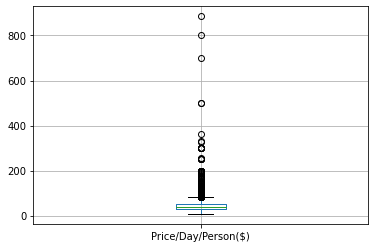

In [32]:
only_apartment.boxplot(column='Price/Day/Person($)', return_type='axes')

In [33]:
prices2=only_apartment['Price/Day/Person($)']
quartiles = prices2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price/day for entire apartments is: {lowerq}")
print(f"The upper quartile of price/day for entire apartment is: {upperq}")
print(f"The interquartile range of price/day for entire apartment is: {iqr}")
print(f"The the median of price/days for entire apartment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price/day for entire apartments is: 29.75
The upper quartile of price/day for entire apartment is: 50.5
The interquartile range of price/day for entire apartment is: 20.75
The the median of price/days for entire apartment is: 38.4 
Values below -1.375 could be outliers.
Values above 81.625 could be outliers.


In [34]:
# Remove outliers and check number of data points  
outlier_filtered2 = only_apartment.loc[(only_apartment['Price/Day/Person($)'] > lower_bound)
                                        &(only_apartment['Price/Day/Person($)'] < upper_bound)]
len(outlier_filtered2)

7025

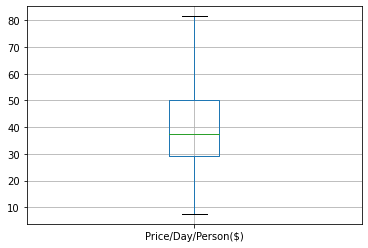

In [35]:
# Create box and whisker plot to check if data is rid of ouliers.
outlier_filtered2.boxplot(column='Price/Day/Person($)', return_type='axes')

### TOP 10 Suburbs (for apartments only)

In [36]:
# Grouping apartments accomodating small groupsizes of 2-6 based on suburbs, find average price/day and get top 10 suburbs.
grouped_top = outlier_filtered2.groupby("Suburbs")['Price/Day/Person($)'].mean().sort_values().tail(10)
grouped_top

Suburbs
Braybrook               46.670000
å¢¨çˆ¾æœ¬ Melbourne     46.670000
Moonee Ponds            49.572500
City of Port Phillip    49.830000
Port Phillip City       50.000000
Albert Park             50.615385
Fitzroy                 50.746160
Ivanhoe East            52.500000
Pascoe Vale South       57.500000
South Kingsville        72.500000
Name: Price/Day/Person($), dtype: float64

In [37]:
# Checking with median values
#grouped_top_median = outlier_filtered2.groupby("Suburbs")['Price/Day/Person($)'].median().sort_values().tail(10)
#grouped_top_median

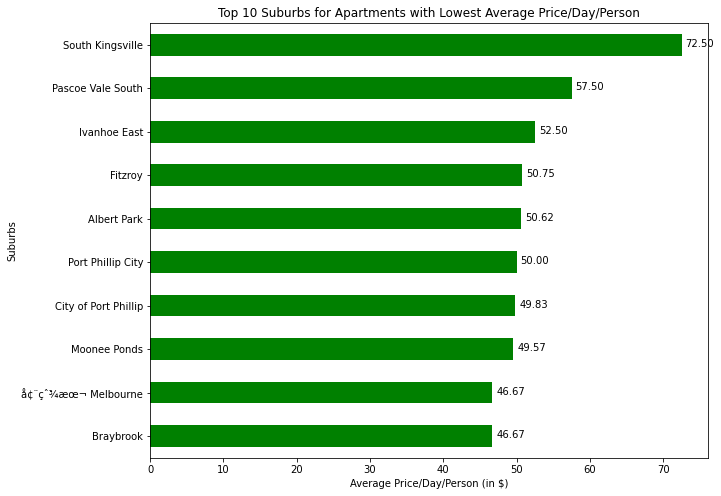

In [38]:
# Plot the top 10 suburbs with highest averageper/day prices.
bplot=grouped_top.plot(kind="barh",figsize=(10,8),color="green")
plt.xlabel("Average Price/Day/Person (in $)")
plt.title("Top 10 Suburbs for Apartments with Lowest Average Price/Day/Person")
for b in bplot.patches:
    width = b.get_width()
    plt.text(2.5+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

In [39]:
# convert top10 dataseries to a Dataframe
top_apt_DF=pd.DataFrame(grouped_top)
top_apt_DF.reset_index(level=0, inplace=True)
top_apt_DF

,Suburbs,Price/Day/Person($)
0,Braybrook,46.670000
1,å¢¨çˆ¾æœ¬ Melbourne,46.670000
2,Moonee Ponds,49.572500
3,City of Port Phillip,49.830000
4,Port Phillip City,50.000000
5,Albert Park,50.615385
6,Fitzroy,50.746160
7,Ivanhoe East,52.500000
8,Pascoe Vale South,57.500000
9,South Kingsville,72.500000


In [41]:
## Print Output Data.
print("Top 10 Suburbs with Highest Average Price/Day/Person for Apartments are : ")
print("-----------------------------------------")
for i in range(0,10):
    suburb_name=top_apt_DF.iloc[i,0]
    suburb_price=round(top_apt_DF.iloc[i,1],0)
    print(f"{suburb_name} has an average price/day/person of ${suburb_price}")

Top 10 Suburbs with Highest Average Price/Day/Person for Apartments are : 
-----------------------------------------
Braybrook has an average price/day/person of $47.0
å¢¨çˆ¾æœ¬ Melbourne has an average price/day/person of $47.0
Moonee Ponds has an average price/day/person of $50.0
City of Port Phillip has an average price/day/person of $50.0
Port Phillip City has an average price/day/person of $50.0
Albert Park has an average price/day/person of $51.0
Fitzroy has an average price/day/person of $51.0
Ivanhoe East has an average price/day/person of $52.0
Pascoe Vale South has an average price/day/person of $58.0
South Kingsville has an average price/day/person of $72.0


## BOTTOM 10 Suburbs (for apartments only)

In [42]:
# Grouping apartments accomodating small groupsizes of 2-6 based on suburbs, find average price/day and get top 10 suburbs.
grouped_bottom = outlier_filtered2.groupby("Suburbs")['Price/Day/Person($)'].mean().sort_values().head(10)
grouped_bottom

Suburbs
Keilor East       12.860000
Hadfield          15.000000
Reservoir         23.333333
Maidstone         25.140000
West Footscray    25.816667
Eaglemont         26.330000
Brighton East     26.653333
Rosanna           26.750000
Airport West      27.250000
Kew East          28.000000
Name: Price/Day/Person($), dtype: float64

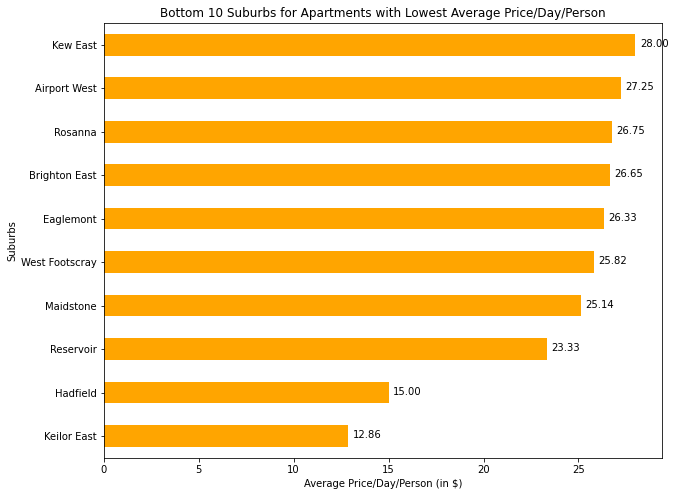

In [43]:
# Plot the bottom 10 suburbs with lowest averageper/day prices.
bplot2=grouped_bottom.plot(kind="barh",figsize=(10,8),color="orange")
plt.xlabel("Average Price/Day/Person (in $)")
plt.title("Bottom 10 Suburbs for Apartments with Lowest Average Price/Day/Person")
for b in bplot2.patches:
    width = b.get_width()
    plt.text(1+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

In [44]:
# convert bottom 10 dataseries to a Dataframe
bottom_apt_DF=pd.DataFrame(grouped_bottom)
bottom_apt_DF.reset_index(level=0, inplace=True)
bottom_apt_DF


,Suburbs,Price/Day/Person($)
0,Keilor East,12.860000
1,Hadfield,15.000000
2,Reservoir,23.333333
3,Maidstone,25.140000
4,West Footscray,25.816667
5,Eaglemont,26.330000
6,Brighton East,26.653333
7,Rosanna,26.750000
8,Airport West,27.250000
9,Kew East,28.000000


In [45]:
# Print Output Data.
print("Top 10 Suburbs with Lowest Average Price/Day/Person for Apartments are : ")
print("-----------------------------------------")
for i in range(0,10):
    suburb_name=bottom_apt_DF.iloc[i,0]
    suburb_price=round(bottom_apt_DF.iloc[i,1],0)
    print(f"{suburb_name} has an average Price/Day/Person of ${suburb_price}")

Top 10 Suburbs with Lowest Average Price/Day/Person for Apartments are : 
-----------------------------------------
Keilor East has an average Price/Day/Person of $13.0
Hadfield has an average Price/Day/Person of $15.0
Reservoir has an average Price/Day/Person of $23.0
Maidstone has an average Price/Day/Person of $25.0
West Footscray has an average Price/Day/Person of $26.0
Eaglemont has an average Price/Day/Person of $26.0
Brighton East has an average Price/Day/Person of $27.0
Rosanna has an average Price/Day/Person of $27.0
Airport West has an average Price/Day/Person of $27.0
Kew East has an average Price/Day/Person of $28.0


## SERVICED APARTMENTS ONLY

### Analyse price data distribution with Price/Day/Person Column

In [46]:
len(only_servapts)

280

In [47]:
# check if price/day data is normally distributed
#plt.hist(price_data_renamed['Price/Day($)'])
normal_test = sts.normaltest(only_servapts['Price/Day/Person($)'].sample(70))
normal_test

NormaltestResult(statistic=33.12641293935783, pvalue=6.40753264640692e-08)

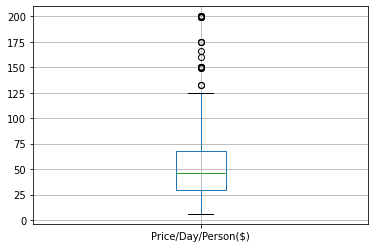

In [48]:
only_servapts.boxplot(column='Price/Day/Person($)', return_type='axes')

In [49]:
prices2=only_servapts['Price/Day/Person($)']
quartiles = prices2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price/day for serviced apartments is: {lowerq}")
print(f"The upper quartile of price/day for serviced apartment is: {upperq}")
print(f"The interquartile range of price/day for serviced apartment is: {iqr}")
print(f"The the median of price/days for entire serviced is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price/day for serviced apartments is: 29.75
The upper quartile of price/day for serviced apartment is: 68.0
The interquartile range of price/day for serviced apartment is: 38.25
The the median of price/days for entire serviced is: 46.0 
Values below -27.625 could be outliers.
Values above 125.375 could be outliers.


In [50]:
# Remove outliers and check number of data points  
outlier_filtered3 = only_servapts.loc[(only_servapts['Price/Day/Person($)'] > lower_bound)
                                        &(only_servapts['Price/Day/Person($)'] < upper_bound)]
len(outlier_filtered3)

257

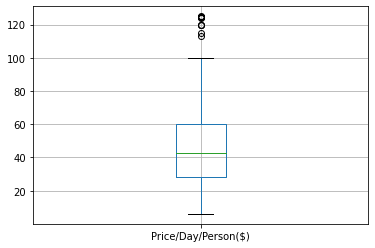

In [51]:
# Create box and whisker plot to check if data is rid of ouliers.
outlier_filtered3.boxplot(column='Price/Day/Person($)', return_type='axes')

### TOP 10 Suburbs (for serviced apartments only)

In [52]:
# Grouping apartments on suburbs and finding average price/day and get top 10 suburbs.
grouped_top = outlier_filtered3.groupby("Suburbs")['Price/Day/Person($)'].mean().sort_values().tail(10)
grouped_top

Suburbs
Northcote          50.750000
Melbourne          54.341364
South Yarra        54.400000
Collingwood        56.750000
Brighton           57.500000
Carlton            57.927500
Port Melbourne     91.750000
Richmond          115.000000
Brunswick East    119.800000
Abbotsford        125.000000
Name: Price/Day/Person($), dtype: float64

In [53]:
# Checking with median values
#grouped_top_median = outlier_filtered2.groupby("Suburbs")['Price/Day/Person($)'].median().sort_values().tail(10)
#grouped_top_median

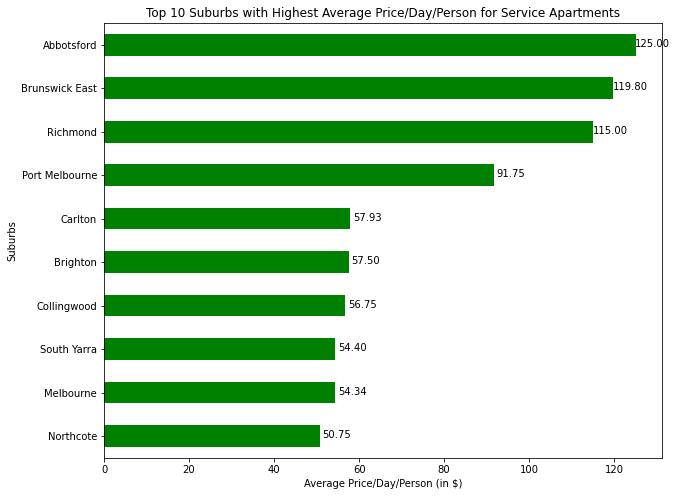

In [54]:
# Plot the top 10 suburbs with highest averageper/day prices.
bplot=grouped_top.plot(kind="barh",figsize=(10,8),color="green")
plt.xlabel("Average Price/Day/Person (in $)")
plt.title("Top 10 Suburbs with Highest Average Price/Day/Person for Service Apartments")
for b in bplot.patches:
    width = b.get_width()
    plt.text(4+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

In [55]:
# convert top10 dataseries to a Dataframe
top_servapt_DF=pd.DataFrame(grouped_top)
top_servapt_DF.reset_index(level=0, inplace=True)
top_servapt_DF

,Suburbs,Price/Day/Person($)
0,Northcote,50.750000
1,Melbourne,54.341364
2,South Yarra,54.400000
3,Collingwood,56.750000
4,Brighton,57.500000
5,Carlton,57.927500
6,Port Melbourne,91.750000
7,Richmond,115.000000
8,Brunswick East,119.800000
9,Abbotsford,125.000000


In [56]:
# Print Output Data.
print("Top 10 Suburbs with Highest Average Price/Day/Person for serviced Apartments: ")
print("-----------------------------------------")
for i in range(0,10):
    suburb_name=top_servapt_DF.iloc[i,0]
    suburb_price=round(top_servapt_DF.iloc[i,1],0)
    print(f"{suburb_name} has an average price/day/person of ${suburb_price}")

Top 10 Suburbs with Highest Average Price/Day/Person for serviced Apartments: 
-----------------------------------------
Northcote has an average price/day/person of $51.0
Melbourne has an average price/day/person of $54.0
South Yarra has an average price/day/person of $54.0
Collingwood has an average price/day/person of $57.0
Brighton has an average price/day/person of $58.0
Carlton has an average price/day/person of $58.0
Port Melbourne has an average price/day/person of $92.0
Richmond has an average price/day/person of $115.0
Brunswick East has an average price/day/person of $120.0
Abbotsford has an average price/day/person of $125.0


## BOTTOM 10 Suburbs (for serviced apartments only)

In [57]:
# Grouping apartments on suburbs and finding average price/day and get top 10 suburbs.
grouped_bottom = outlier_filtered3.groupby("Suburbs")['Price/Day/Person($)'].mean().sort_values().head(10)
grouped_bottom

Suburbs
Kensington         21.600000
North Melbourne    28.195385
East Melbourne     31.110000
Balaclava          34.000000
Docklands          36.256400
Caulfield North    38.750000
South Melbourne    39.610000
West Melbourne     42.191500
St Kilda           42.273077
Kew                44.000000
Name: Price/Day/Person($), dtype: float64

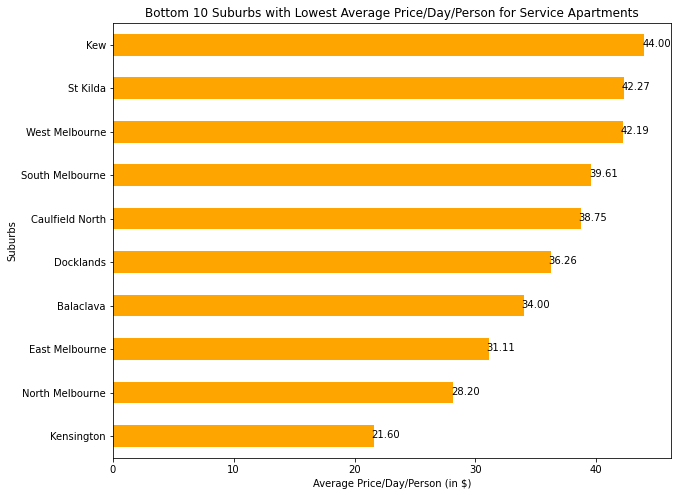

In [58]:
# Plot the bottom 10 suburbs with lowest averageper/day prices.
bplot2=grouped_bottom.plot(kind="barh",figsize=(10,8),color="orange")
plt.xlabel("Average Price/Day/Person (in $)")
plt.title("Bottom 10 Suburbs with Lowest Average Price/Day/Person for Service Apartments")
for b in bplot2.patches:
    width = b.get_width()
    plt.text(1+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

In [59]:
# convert bottom 10 dataseries to a Dataframe
bottom_servapt_DF=pd.DataFrame(grouped_bottom)
bottom_servapt_DF.reset_index(level=0, inplace=True)
bottom_servapt_DF

,Suburbs,Price/Day/Person($)
0,Kensington,21.600000
1,North Melbourne,28.195385
2,East Melbourne,31.110000
3,Balaclava,34.000000
4,Docklands,36.256400
5,Caulfield North,38.750000
6,South Melbourne,39.610000
7,West Melbourne,42.191500
8,St Kilda,42.273077
9,Kew,44.000000


In [60]:
# Print Output Data.
print("Bottom 10 Suburbs with Lowest Average Price/Day/Person for Service Apartments are : ")
print("-----------------------------------------")
for i in range(0,10):
    suburb_name=bottom_servapt_DF.iloc[i,0]
    suburb_price=round(bottom_servapt_DF.iloc[i,1],0)
    print(f"{suburb_name} has an average Price/Day/Person of ${suburb_price}")

Bottom 10 Suburbs with Lowest Average Price/Day/Person for Service Apartments are : 
-----------------------------------------
Kensington has an average Price/Day/Person of $22.0
North Melbourne has an average Price/Day/Person of $28.0
East Melbourne has an average Price/Day/Person of $31.0
Balaclava has an average Price/Day/Person of $34.0
Docklands has an average Price/Day/Person of $36.0
Caulfield North has an average Price/Day/Person of $39.0
South Melbourne has an average Price/Day/Person of $40.0
West Melbourne has an average Price/Day/Person of $42.0
St Kilda has an average Price/Day/Person of $42.0
Kew has an average Price/Day/Person of $44.0


### BACKUP CODE

In [ ]:
#Checking if median yeilds similar results.
#apt_acc_grouped_med = apt_acc_grouped.groupby(["Suburbs"]).median()
#apt_acc_grouped2_med

In [ ]:
#Checking if median yeilds similar results.Note: Indeed getting similar ratings
#topsuburbs_med = apt_acc_grouped2_med.sort_values("Price/Day($)",ascending=False)
#topsuburbs_med.head(10)

In [ ]:
# Checking for results if median value is taken for calculation, will the results change.
#grouped_suburb2 = suburb_analysis_df.groupby(['Suburbs']).median()
#grouped_suburb2

In [ ]:
# Checking if choosing median changes the results. 
#sorted_topsuburbs2 = grouped_suburb2.sort_values("Price/Day($)",ascending=False)
#sorted_topsuburbs2.head(10)